In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [39]:
df = pd.read_csv(r"G:\ML\home_price_prediction\train.csv")

In [40]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [41]:
data_set = df.drop(columns='ADDRESS')
data_set.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [42]:
data_set.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64>

In [43]:
for col in data_set:
    unique_val = np.unique(data_set[col])
    unique_len = len(unique_val)
    if unique_len<10:
        print("The number of values for feature {} is: {} -- {}".format(col, unique_len, unique_val))
    else:
        print("The number of values for feature {} is: {} -- {}".format(col, unique_len, unique_val))

The number of values for feature POSTED_BY is: 3 -- ['Builder' 'Dealer' 'Owner']
The number of values for feature UNDER_CONSTRUCTION is: 2 -- [0 1]
The number of values for feature RERA is: 2 -- [0 1]
The number of values for feature BHK_NO. is: 16 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 17 20]
The number of values for feature BHK_OR_RK is: 2 -- ['BHK' 'RK']
The number of values for feature SQUARE_FT is: 19561 -- [3.00000000e+00 3.98559424e+00 5.00000000e+00 ... 8.06451613e+07
 1.87500000e+08 2.54545454e+08]
The number of values for feature READY_TO_MOVE is: 2 -- [0 1]
The number of values for feature RESALE is: 2 -- [0 1]
The number of values for feature LONGITUDE is: 4087 -- [-37.7130075  -27.550328   -23.485199   ...  52.556894    58.69175268
  59.912884  ]
The number of values for feature LATITUDE is: 4078 -- [-121.7612481 -117.0016994 -114.053121  ...  139.554449   144.9578428
  152.962676 ]
The number of values for feature TARGET(PRICE_IN_LACS) is: 1172 -- [2.5e-01 2.9e-01 

In [44]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


<AxesSubplot:xlabel='POSTED_BY', ylabel='count'>

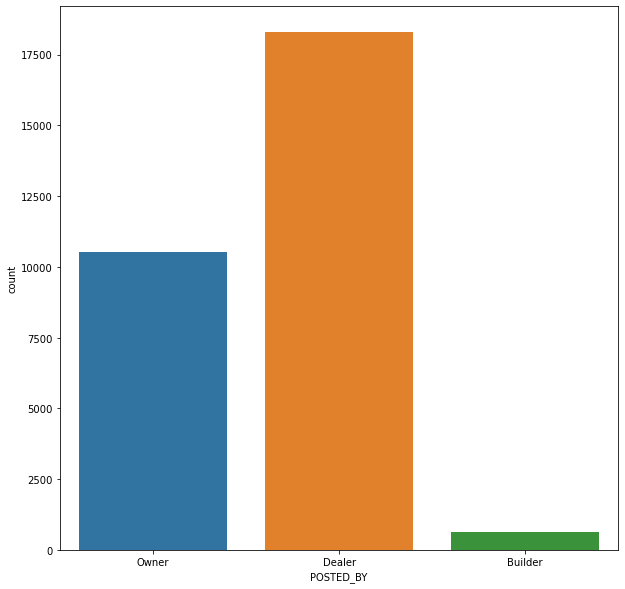

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(data = data_set,x='POSTED_BY')

In [46]:
dummies = pd.get_dummies(data_set.POSTED_BY)
dummies1 = pd.get_dummies(data_set.BHK_OR_RK)
dummies1

,BHK,RK
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
29446,1,0
29447,1,0
29448,1,0
29449,1,0


In [56]:
data_set1= pd.concat([dummies,dummies1,data_set],axis =1)
data_set2 = data_set1.drop(columns = ['Builder','RK','POSTED_BY','BHK_OR_RK'])
data_set2

,Dealer,Owner,BHK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,1,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,1,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,1,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,1,1,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,1,1,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,1,0,1,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,1,1,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


<AxesSubplot:xlabel='SQUARE_FT', ylabel='Count'>

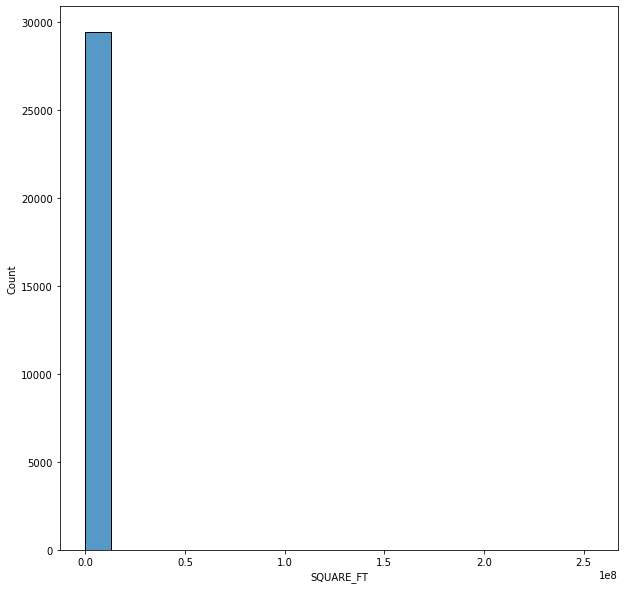

In [57]:
plt.figure(figsize=(10,10))
sns.histplot(df['SQUARE_FT'], bins = 20)

<AxesSubplot:xlabel='LONGITUDE', ylabel='Count'>

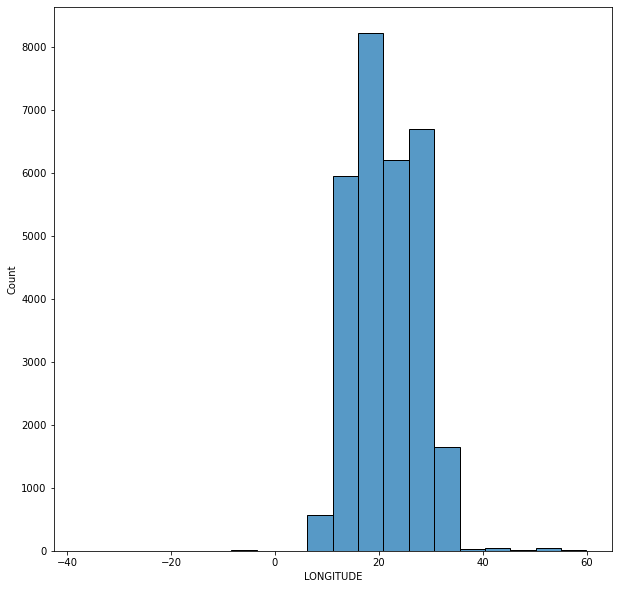

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(df['LONGITUDE'], bins = 20)

In [59]:
data_set2['SQUARE_FT'] = np.log(data_set2['SQUARE_FT'])
data_set2['LONGITUDE'] = np.log(data_set2['LONGITUDE'])
data_set2['LATITUDE'] = np.log(data_set2['LATITUDE'])
data_set2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Dealer,Owner,BHK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,1,1,0,0,2,7.170301,1,1,2.562632,4.351541,55.0
1,1,0,1,0,0,2,7.150701,1,1,2.507527,4.339179,51.0
2,0,1,1,0,0,2,6.838576,1,1,2.547728,4.351982,43.0
3,0,1,1,0,1,2,6.835100,1,1,3.354885,4.348269,62.5
4,1,0,1,1,0,2,6.906764,0,1,3.117605,4.482832,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,1,1,0,0,3,7.824046,1,1,3.301032,4.357264,45.0
29447,0,1,1,0,0,2,6.645391,1,1,3.687514,NaN,16.0
29448,1,0,1,0,0,2,6.930144,1,1,3.293196,4.328468,27.1
29449,0,1,1,0,0,2,6.832039,1,1,2.557239,4.384871,67.0


<AxesSubplot:xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

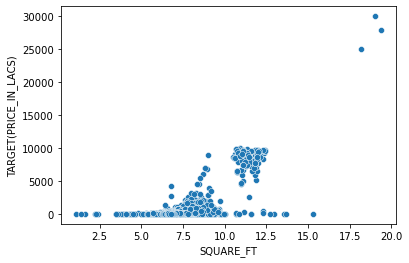

In [60]:
plt.plot(10,10)
sns.scatterplot(data = data_set2, y= 'TARGET(PRICE_IN_LACS)', x = 'SQUARE_FT')

<AxesSubplot:xlabel='LONGITUDE', ylabel='TARGET(PRICE_IN_LACS)'>

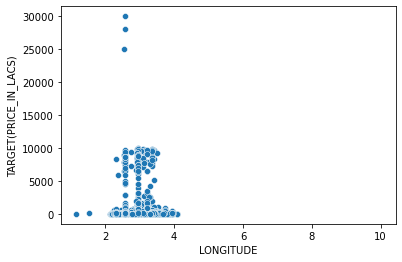

In [61]:
plt.plot(10,10)
sns.scatterplot(data = data_set2, y= 'TARGET(PRICE_IN_LACS)', x = 'LONGITUDE')

<AxesSubplot:xlabel='Dealer', ylabel='TARGET(PRICE_IN_LACS)'>

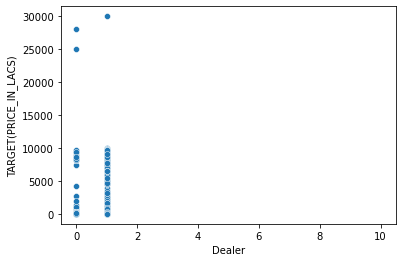

In [62]:
plt.plot(10,10)
sns.scatterplot(data = data_set2, y= 'TARGET(PRICE_IN_LACS)', x = 'Dealer')

In [76]:
data_set3 = data_set2.drop(columns = ['LONGITUDE','LATITUDE']) 
data_set3

,Dealer,Owner,BHK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,0,1,1,0,0,2,7.170301,1,1,55.0
1,1,0,1,0,0,2,7.150701,1,1,51.0
2,0,1,1,0,0,2,6.838576,1,1,43.0
3,0,1,1,0,1,2,6.835100,1,1,62.5
4,1,0,1,1,0,2,6.906764,0,1,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,0,1,1,0,0,3,7.824046,1,1,45.0
29447,0,1,1,0,0,2,6.645391,1,1,16.0
29448,1,0,1,0,0,2,6.930144,1,1,27.1
29449,0,1,1,0,0,2,6.832039,1,1,67.0


In [82]:
X = data_set3.iloc[:,:-1]
y = data_set3.iloc[:,1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Dealer                0
Owner                 0
BHK                   0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
dtype: int64>

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [84]:
print(lr.score(X_train, y_train))
print(lr.score(X_valid, y_valid))

1.0
1.0


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_valid)

print('Random Forest: ', r2_score(y_valid, preds))

Random Forest:  1.0


In [81]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

preds = dt.predict(X_train)

r2_score(y_train, preds)

1.0